`Neural Network Regression w/TensorFlow`

### Coverage:
* Input/Output shapes of a reg model (features and labels)
* Architecture of a reg model
* Creating custom data to view and fit
* Steps in modelling `create a model, compile, fit, evaluate *CrCoFiEv*`
* Evaluation Methods
* Saving & Loading Models

In [1]:
# lets see how you do comments
import tensorflow as tf
import numpy as np
tf.__version__
import matplotlib.pyplot as plt

2023-01-02 23:54:15.516025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


`Regression Inputs and Outputs`
* For a Reg problem, the shape of the [output] is normally 1; shape=[1] as we often try to predict some number.

In [2]:
# Create Features / inputs
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14]) # uppercase 
# create labels
y = np.array([3,6,9,12,15,18,21,24]) #lower case
# visualize
# plt.scatter(X, y)

In [3]:
# what is the pattern btn the features and the labels
y == X + 10 # this is the relationship our neural net was supposed to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

`What then might the shapes be for our Input/Output`

In [4]:
X.shape, y.shape

((8,), (8,))

In [5]:
X, y

(array([-7, -4, -1,  2,  5,  8, 11, 14]),
 array([ 3,  6,  9, 12, 15, 18, 21, 24]))

In [6]:
# create a demo tensor for or housing price prediction problem
house = tf.constant(np.array([[10,11,12,13], [1,2,3,4], [6,7,8,9]]), dtype=tf.float32)
price = tf.constant([1243537])
house, price

2023-01-02 23:54:19.348877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
 array([[10., 11., 12., 13.],
        [ 1.,  2.,  3.,  4.],
        [ 6.,  7.,  8.,  9.]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1243537], dtype=int32)>)

In [7]:
# create demo with a string input
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([12489141])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([12489141], dtype=int32)>)

* wanna create a prediction feature : X[0] what is the equivalent y[?]

In [8]:
# turn the np arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [9]:
X[0].shape, y[0].shape # these are scalar values, have no dimension

(TensorShape([]), TensorShape([]))

### Prediction Feature : Building a model
* Creating a Model : `define input hidden and output layer`
* Compile the model : `define loss function and the optimizer and evaluation metric`
* Fit the Model : `let the model try to find patterns btn X(features) and y(labels)`

In [10]:
 # set random seed for reproducibility
tf.random.set_seed(42)

# # create a model using the Sequential API - this is a method of going through all things sequentially
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(1)
# ]) # create a list within Sequential Method instead of using .add

model = tf.keras.models.Sequential() # to create a model using Sequential API, shape must be defined
model.add(tf.keras.layers.Input(shape=(1,)))

model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae, # mean abs error
            optimizer=tf.keras.optimizers.Adam(lr=0.01), #stochastic gradient descend
            metrics=["mae"]
)

`metrics: human readable and interpretation over the models performance`

In [11]:
# fit the model - let us find patterns
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 849ms/step - loss: 13.1095 - mae: 13.1095
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 13.0386 - mae: 13.0386
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 12.9676 - mae: 12.9676
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 12.8966 - mae: 12.8966
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 12.8254 - mae: 12.8254
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 12.7542 - mae: 12.7542
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 12.6828 - mae: 12.6828
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 12.6113 - mae: 12.6113
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 12.5397 - mae: 12.5397
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 12.4680 - mae: 12.4680
Epoch 11/2000
1/1 [===========================

In [12]:
# make a predction for what x[17] should be
model.predict([17])

1/1 [==============================] - 0s 151ms/step


array([[27.045557]], dtype=float32)

In [13]:
model.predict([12])

1/1 [==============================] - 0s 58ms/step


array([[22.03111]], dtype=float32)

`Evaluating a Model` : visualize visualize visualize
* The data - what data are working with
* The Model - what does it look like
* The Training - how it perfomes as it learns
* The Predictions - how they lines up with ground truth (labeled data)

In [14]:
# create a larger model
X = tf.range(-100, 100, 4)
# create a larger label : (matmul)
y = tf.add(X,X)
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-200, -192, -184, -176, -168, -160, -152, -144, -136, -128, -120,
        -112, -104,  -96,  -88,  -80,  -72,  -64,  -56,  -48,  -40,  -32,
         -24,  -16,   -8,    0,    8,   16,   24,   32,   40,   48,   56,
          64,   72,   80,   88,   96,  104,  112,  120,  128,  136,  144,
         152,  160,  168,  176,  184,  192], dtype=int32)>)

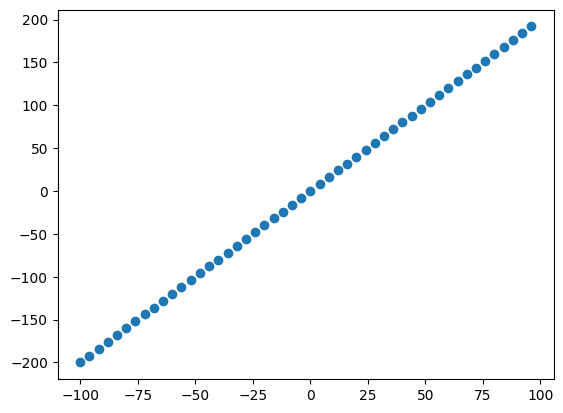

In [15]:
# visualize the data
plt.scatter(X,y)

`split X and y into a training and test set`

In [16]:
# # use scikit to perform the test and train
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33)

In [17]:
# check the length of our data set
len(X), len(y)

(50, 50)

In [18]:
# spilt into an 80% & 20%
X_train = X[:40] # get the first 40 samples
y_train = y[:40]

X_test = X[40:] # last 10 elements
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

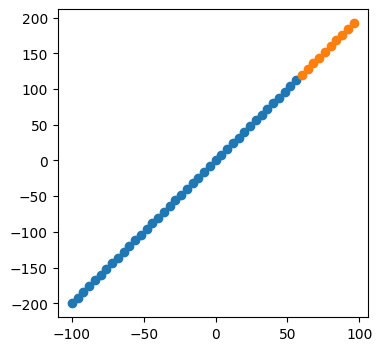

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train) # train
plt.scatter(X_test, y_test) #test

In [20]:
# Build a Neural Net that learns a relationship btn X and y; such that it can predict the X and y values
# Create -> Compile -> Fit

#1. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), #we are trying to predict only one input vs output value
])

#2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
loss=tf.keras.losses.mae,
metrics=["mae"]
)
#3. Fit the model
# model.fit(X_train, y_train, epochs=2000)

`For visualizing`

In [21]:
# what type of data are we dealing with - determines the input_shape
# one input for one output
X_train[0], y_train[0] #single numbers

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-200>)

In [22]:
# set the seed for reproducibility
tf.random.set_seed(42)
# create the model; but specify the input shape on the first layer
viz_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), # dealing with scalar data
])
# compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
    )

In [23]:
# visualize the model before running it.
viz_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit our original model, this is after observing the structure of our model

model.fit(X_train, y_train, epochs=2000, verbose=2) # training_data(X_train), label_data(y_train)

Epoch 1/2000
2/2 - 0s - loss: 10.9255 - mae: 10.9255 - 463ms/epoch - 232ms/step
Epoch 2/2000
2/2 - 0s - loss: 9.0070 - mae: 9.0070 - 6ms/epoch - 3ms/step
Epoch 3/2000
2/2 - 0s - loss: 10.5772 - mae: 10.5772 - 8ms/epoch - 4ms/step
Epoch 4/2000
2/2 - 0s - loss: 10.3756 - mae: 10.3756 - 6ms/epoch - 3ms/step
Epoch 5/2000
2/2 - 0s - loss: 10.8061 - mae: 10.8061 - 6ms/epoch - 3ms/step
Epoch 6/2000
2/2 - 0s - loss: 8.5012 - mae: 8.5012 - 8ms/epoch - 4ms/step
Epoch 7/2000
2/2 - 0s - loss: 5.5946 - mae: 5.5946 - 6ms/epoch - 3ms/step
Epoch 8/2000
2/2 - 0s - loss: 5.3719 - mae: 5.3719 - 8ms/epoch - 4ms/step
Epoch 9/2000
2/2 - 0s - loss: 10.4576 - mae: 10.4576 - 7ms/epoch - 4ms/step
Epoch 10/2000
2/2 - 0s - loss: 13.0303 - mae: 13.0303 - 6ms/epoch - 3ms/step
Epoch 11/2000
2/2 - 0s - loss: 9.5635 - mae: 9.5635 - 8ms/epoch - 4ms/step
Epoch 12/2000
2/2 - 0s - loss: 12.5640 - mae: 12.5640 - 8ms/epoch - 4ms/step
Epoch 13/2000
2/2 - 0s - loss: 13.5195 - mae: 13.5195 - 6ms/epoch - 3ms/step
Epoch 14/2000


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.predict([96])

1/1 [==============================] - 0s 98ms/step


array([[204.53754]], dtype=float32)

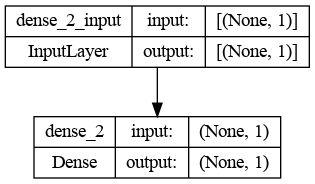

In [27]:
# another visualizing feature
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

##### Proceeding with the viz_model

In [28]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a viz model; Also, going to practise layer and model naming.
viz_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='first_input_layer'),
    tf.keras.layers.Dense(1, name='output_first_input_layer')
], name="Model_for_Visualization")

#compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics='mae',
    loss= tf.losses.mae
)

In [29]:
viz_model.summary()

Model: "Model_for_Visualization"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_input_layer (Dense)   (None, 10)                20        
                                                                 
 output_first_input_layer (D  (None, 1)                11        
 ense)                                                           
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### `Visualizing Model Predictions`

In [30]:
y_pred = model.predict(X_test) # predict on the test data
y_pred, y_test # compare the predicted value using the test data using the actual values [y_test]

1/1 [==============================] - 0s 75ms/step


(array([[127.84075],
        [136.36263],
        [144.88449],
        [153.40636],
        [161.9282 ],
        [170.45007],
        [178.97194],
        [187.4938 ],
        [196.01567],
        [204.53754]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([120, 128, 136, 144, 152, 160, 168, 176, 184, 192], dtype=int32)>)

`Create a Plotting Function`

In [31]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions=y_pred):

    """
    Plots training_data, test_data and compares prediction to ground truth labels [y_test]
    """
    plt.figure(figsize=(5,5))
    # plot the traing data
    plt.scatter(train_data, train_labels, label="Training_Data")
    # # plot the testing data
    # plt.scatter(test_data, test_labels, "Testing_Data")
    # # plot the predictions
    plt.scatter(test_data, predictions)
    # plt.legend();
    # plt.show()

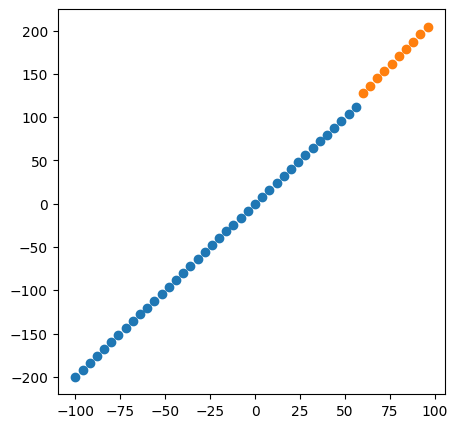

In [32]:
# call the function
plot_prediction()

`Regression Evaluation Metrics`

In [33]:
model.evaluate(X_test, y_test) # evaluation is carried outon the test dataset.
# returns - loss, mae

1/1 [==============================] - 0s 201ms/step - loss: 10.1891 - mae: 10.1891


[10.189146041870117, 10.189146041870117]

#### be metric specific

In [34]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.727398, 24.65495 , 21.423101, 20.      , 20.385641, 22.580029,
       26.583164, 32.395042, 40.01567 , 48.537537], dtype=float32)>

In [35]:
loss = tf.keras.losses.mean_absolute_error(y_true=y_test, y_pred=y_pred)
loss

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.727398, 24.65495 , 21.423101, 20.      , 20.385641, 22.580029,
       26.583164, 32.395042, 40.01567 , 48.537537], dtype=float32)>

In [36]:
y_pred.shape, y_test.shape
# we ran into errors above due to differing shapes.
# thereofe, we can add or squeeze a tensor.. lets do so on y_pred

((10, 1), TensorShape([10]))

In [37]:
# squeeze y_pred
y_pred_sq = tf.squeeze(y_pred)

In [38]:
y_pred_sq.shape

TensorShape([10])

In [39]:
# running the loss functions after squeezing
loss_mae = tf.metrics.mean_absolute_error(y_test, y_pred_sq)
loss_mae.numpy()

10.189146

`we get an output as of 10.292981 - this output is similar to the one by the model metric`

In [40]:
loss_mse = tf.keras.losses.mean_squared_error(y_pred=y_pred_sq, y_true=y_test)
loss_mse.numpy()

106.06551